<h1> Apply two clustering techniques available on Scikit-learn and compare and evaluate the obtained results for breast cancer databases.</h1>


# 1/- Dataset description
According to the <a  href = "https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29">dataset documentation</a>: 

This breast cancer databases was obtained from the University of Wisconsin
Hospitals, Madison from Dr. William H. Wolberg. 

1. Number of Instances: 699 

2. Number of Attributes: 10 plus the class attribute

3. Attribute Information: (class attribute has been moved to last column)

4. Missing attribute values: 16

5. Class distribution:
   Benign: 458 (65.5%),
   Malignant: 241 (34.5%)

**Attributs :**

| Attribute                   | Domain                          |
|-----------------------------|---------------------------------|
| Sample code number          | id number                       |
| Clump Thickness             | 1 - 10                          |
| Uniformity of Cell Size     | 1 - 10                          |
| Uniformity of Cell Shape    | 1 - 10                          |
| Marginal Adhesion           | 1 - 10                          |
| Single Epithelial Cell Size | 1 - 10                          |
| Bare Nuclei                 | 1 - 10                          |
| Bland Chromatin             | 1 - 10                          |
| Normal Nucleoli             | 1 - 10                          |
| Mitoses                     | 1 - 10                          |
| Class                       | (2 for benign, 4 for malignant) |


The attributes are discrete numiric data.

> Note : Credit to Dr. William H. Wolberg and the University of Wisconsin Hospitals for Dataset

# 2/- Understanding the data and preprocessing
## 2.1/- Data loading

We have the data in .data format. We are going to use the lib pandas to extract the data in Dataframe to be able to visualize and manipulate them.

In [2]:
import pandas as pd
breast_cancer_data = pd.read_table("breast-cancer-wisconsin.data", sep=",")

# Add the columns names respectively 
breast_cancer_data.columns = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", 
                              "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
                              "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]

# Display the first values in tabular mode 
breast_cancer_data.head()


Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1002945                5                        4   
1             1015425                3                        1   
2             1016277                6                        8   
3             1017023                4                        1   
4             1017122                8                       10   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         4                  5                            7   
1                         1                  1                            2   
2                         8                  1                            3   
3                         1                  3                            2   
4                        10                  8                            7   

  Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0          10                3                2        1      2  
1           2                3                1        1      2  
2           4                3                7        1      2  
3           1                3                1        1      2  
4          10                9                7        1      4

## 2.2/-  Data discription

We will use the discribe() function of Dataframe which allows to make a statistical summary of the data. the values studied are : Mean, standard deviation, Min, Max, Q1 (First quartiles  25%), Q2 (Second quartiles 50% or median) , Q3 (theard quartiles 75%)

In [2]:
breast_cancer_data.describe()

Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.980000e+02       698.000000               698.000000   
mean         1.071807e+06         4.416905                 3.137536   
std          6.175323e+05         2.817673                 3.052575   
min          6.163400e+04         1.000000                 1.000000   
25%          8.702582e+05         2.000000                 1.000000   
50%          1.171710e+06         4.000000                 1.000000   
75%          1.238354e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                698.000000         698.000000   
mean                   3.210602           2.809456   
std                    2.972867           2.856606   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000           1.000000   
75%                    5.000000           4.000000   
max                   10.000000          10.000000   

       Single Epithelial Cell Size  Bland Chromatin  Normal Nucleoli  \
count                   698.000000       698.000000       698.000000   
mean                      3.217765         3.438395         2.869628   
std                       2.215408         2.440056         3.055004   
min                       1.000000         1.000000         1.000000   
25%                       2.000000         2.000000         1.000000   
50%                       2.000000         3.000000         1.000000   
75%                       4.000000         5.000000         4.000000   
max                      10.000000        10.000000        10.000000   

          Mitoses       Class  
count  698.000000  698.000000  
mean     1.590258    2.690544  
std      1.716162    0.951596  
min      1.000000    2.000000  
25%      1.000000    2.000000  
50%      1.000000    2.000000  
75%      1.000000    4.000000  
max     10.000000    4.000000

According to the above, table we can see how our data is distributed and what spectrum of values we have. 

**For example :** 
For the Clump Thickness attribute we have the values between 1 and 10 which is indicated on the doc. In addition to that we can determine that 25% of data are between 1 and 2 and 50% are below 4 and 75% of data are below 6 and 25% of data are above 6. This gives us an idea of the data distribution . Standard deviation give us the average amount of variability in our attribute. It tells us, on average, how far each value lies from the mean.


## 2.3/- Data cleaning

### 2.3.1/- Missing values

In our Dataset, missing values is represented by caracter "?". According to the documentation we have 16 missing values let's check this. First we should transforme "?" to nan . then we check messing values.

In [3]:
# replace "?" by nan
import numpy as np
breast_cancer_data_null = breast_cancer_data.replace('?', np.nan)

In [4]:
# checking missing values
breast_cancer_data_null.isnull().sum()

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

We notice that we have 16 missing values in the attribute Bare Nuclei. All the other attributes are complete. 

### 2.3.2/- **Dealing with missing values :**

To handel missing data we have multiple solutions in the literature. 

1. Delete missing values: drop the row/column containing missing values 

In our case we can chose to drop missing row because we don't have huge numbre of missing values (16 rows) .

2. Fill in the missing value manually 

For this method we should contact an expert (in our case we don't have capabilty to do that) 

3. Fill in it automatically (data imputation) whith:
        - a global constant
        - the attribute mean/median/mode/common value
        - the most probable value using machine learning algorithm (KNN, SVM , regression ... ) 
        
The missing values in the dataset cannot be deleted since the dataset is too small (only 699 samples). The K-Nearest Neighbors method is used instead to anticipate the missing vales. For predicting the mising values, the previously produced subgroups are utilized as training and testing data. We will use gridsearch with accuracy to dertmine best K. 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# Get data with missing values
breast_cancer_data_absent = breast_cancer_data[breast_cancer_data['Bare Nuclei']=="?"]
breast_cancer_data_absent = breast_cancer_data_absent.reset_index()
breast_cancer_data_absent = breast_cancer_data_absent.drop(columns=['index'])


# Get data without missing values

breast_cancer_data_present = breast_cancer_data[breast_cancer_data['Bare Nuclei']!="?"]
breast_cancer_data_present = breast_cancer_data_present.reset_index()
breast_cancer_data_present = breast_cancer_data_present.drop(columns=["index"])
breast_cancer_data_present = breast_cancer_data_present.astype(np.float64)

# Make bare nucleali as class for KNN algo
ym = breast_cancer_data_present['Bare Nuclei'].values
xm = breast_cancer_data_present.drop(columns=['Bare Nuclei']).values




#  Set the K value to be searched,'n_neightbors' is the parameter of KNN in sklearn
parameters={'n_neighbors':range(1,31)}
knn=KNeighborsClassifier()#Note: There is no need to specify parameters here

#  Search for the best K value through GridSearchCV. The inside of this module is actually to evaluate each K value
clf=GridSearchCV(knn,parameters, cv = 4)  #50% off
clf.fit(xm,ym)

print("Ultimate accuracy rate: %.2f"%clf.best_score_,"The final optimal K value",clf.best_params_)
# Predict missing values
breast_cancer_data_absent_drop = breast_cancer_data_absent.drop(columns=['Bare Nuclei'])
y_pred = clf.predict(breast_cancer_data_absent_drop.values)

# Concat all values to get intial dataset
breast_cancer_data_absent_drop['Bare Nuclei'] = y_pred
frames  = [breast_cancer_data_absent_drop,breast_cancer_data_present ]
breast_cancer_data = pd.concat(frames)

# checking null
breast_cancer_data_null = breast_cancer_data.replace('?', np.nan)
breast_cancer_data_null.isnull().sum()

Ultimate accuracy rate: 0.56 The final optimal K value {'n_neighbors': 22}


Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
Bare Nuclei                    0
dtype: int64

### 2.3.3/- Noisy data

To see if we have outliers we can plot a boxplot for variable execpting class and id (id is unique value).In the plot blow all black points are outliers. To deal with this noisy values we have multiple methodes in literature like : Binning, Regression, Clustering (outlier analysis), Combined computer and human inspection ... In our case we can see that we don't have huge numbre of outliers and it's not the object of this project then we will be satisfied to see those outliers.


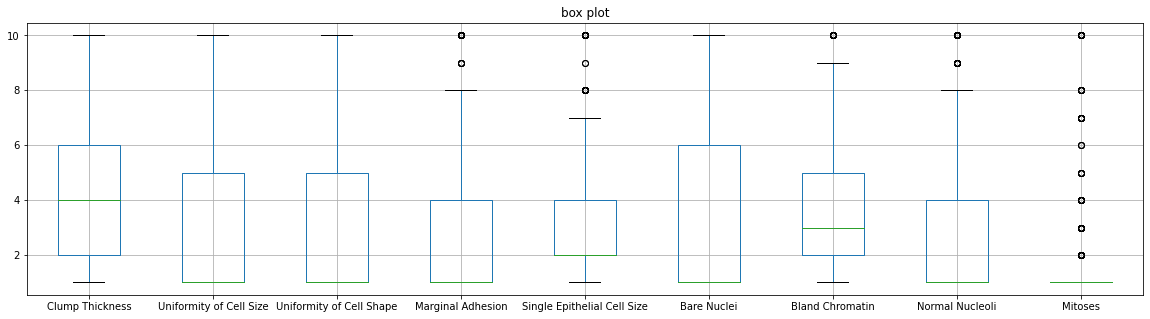

In [6]:
import matplotlib.pyplot as plt
plt.figure (figsize=(20,5))
plt.title("box plot")

boxplot = breast_cancer_data.boxplot(column=[ "Clump Thickness", "Uniformity of Cell Size", 
                              "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
                              "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses" ])


## 2.4/- Measuring the Central Tendency
In this section, we will discribe the center of a data set. To do that we should calculte diffrents musure like Mean, median , Max, Min which are already calculated in the section 2.2 (Data discription) .  Now we have to see the distribution of data by distribution graphs and render them in Gaussian form  

### 2.4.1/- Destribution of data

Dans le graph ci-desous on peut voir les distributions des  attributs . on peut remarquer clairement que les attribut ne sui pas un distribution gaussiane. 
The majority of Machine Learning algorithms operate on the premise that the data is normally distributed.
However, not all machine learning algorithms make such assumptions about the sort of data distribution it will operate with in advance, but instead learn it directly from the data used for training. Generally we have: 


data are **right-skewed** (clustered at lower values) move down the ladder of powers  or  
data are **left-skewed** (clustered at higher values) move up the ladder of powers.


In our case the majority of the attributes are  **right-skewed**.

We have several methods to see the non-gaussian distribution of data among them to plot the histogram below . other methods : 
  - Checking the distribution of variables using KDE plot
  
  ![](plt1.png)
  
  - Checking the distribution of variables using a Q-Q plot
  ![](plt2.png)
  -  ...



> Note: we don't tranforme Id and class attributes. Transformations on a class variable will change the distribution of error terms in a model. Thus, incompatibility of model errors with an assumed distribution can sometimes be remedied with transformations of the dependent variable.

> credit two images abouve to https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/

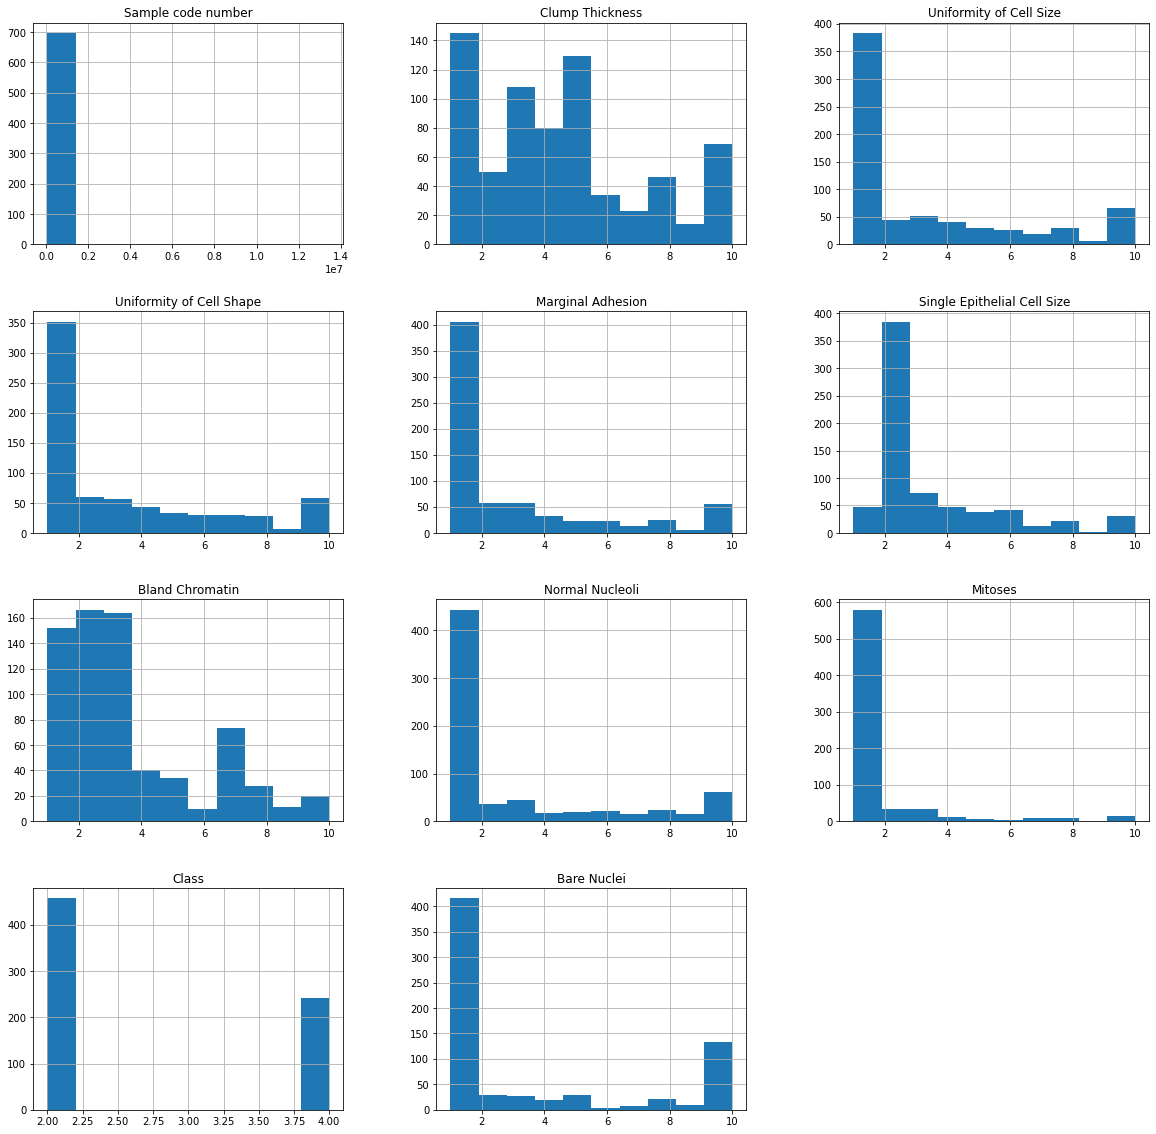

In [7]:
breast_cancer_data.hist(figsize = (20,20));

### 2.4.2/- Tranformation to make data in gussian distribution

Our data has to be transformed to approximate to a gaussain distribution. To do that we have servel methodes : 

- square root
- cube root 
- logarithmic
- Box-Cox
- Yeo-Johnson ...

According to [this article](https://medium.com/analytics-vidhya/techniques-to-transform-data-distribution-565a4d0f2da) if we have **right-skewed** is preferd to use quare root, cube root or logarithmic. In our case we have **right-skewed** with only postive variables then we will use logarithmic transformation

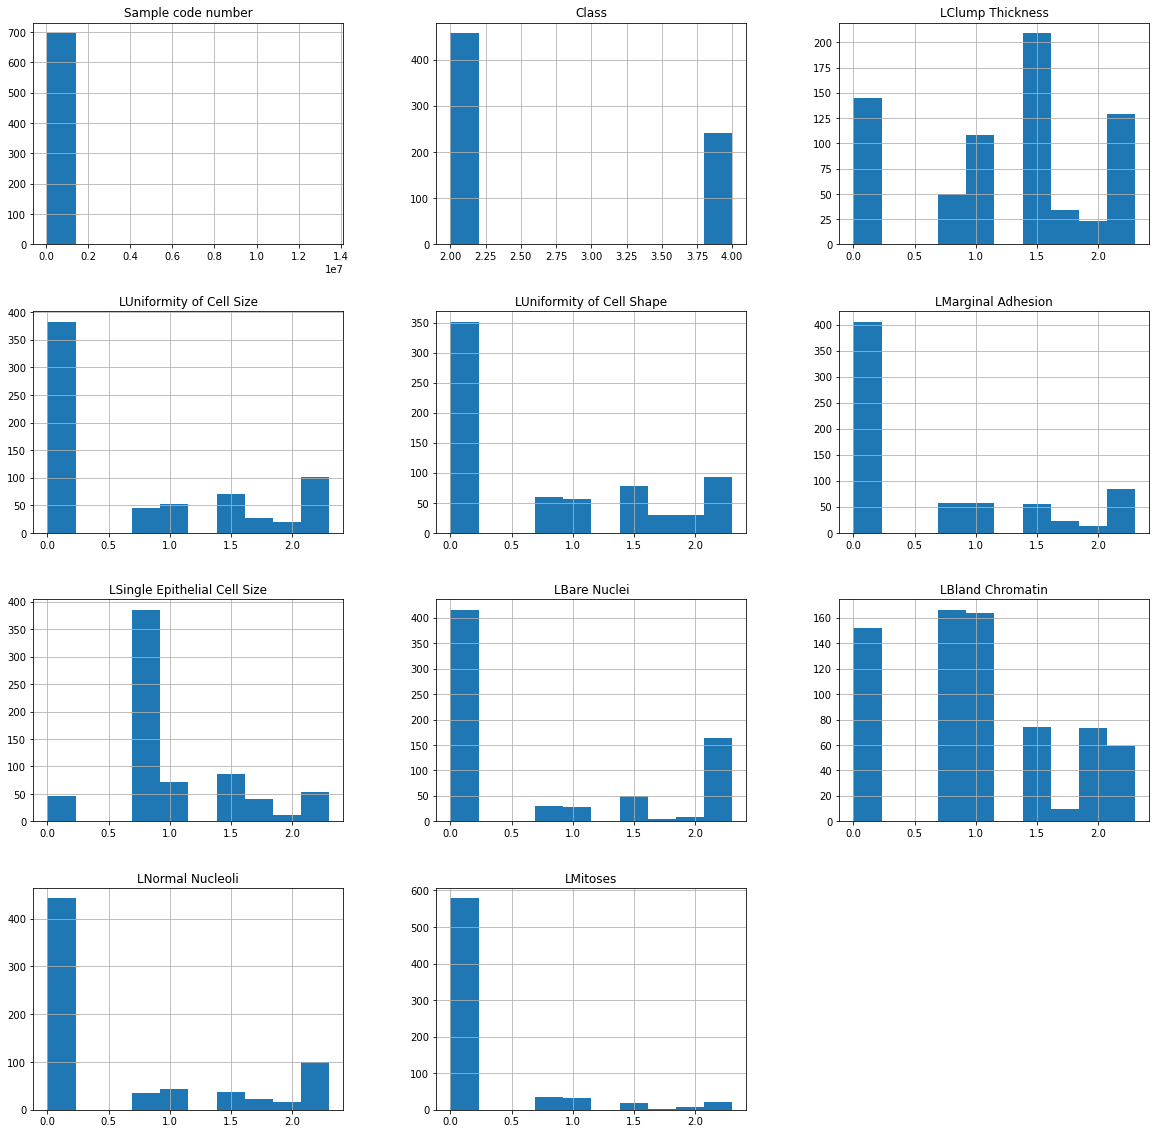

In [8]:
from math import sqrt, log

tranformed_col = ["Clump Thickness", "Uniformity of Cell Size", 
                  "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size",
                  "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses"]
for c in tranformed_col : 
    breast_cancer_data["L"+ c] = breast_cancer_data[c].map(lambda x: log(x))
    del breast_cancer_data[c]
    
breast_cancer_data.hist(figsize = (20,20));

### 2.4.3/- Imbalanced  data

According to the documentation abouve we have Benign: 458 (65.5%), Malignant: 241 (34.5%) for class attribute. This means that we have imbalanced data between the two classes .Wich is confirmed by the graph below. 

We are not going to treat this problem, since we are going to use a clustering algo which is a unsupervised algo. This unbalance will help us to match the classes generated by the clustering algo. We clearly notice that we have 2 times more Benign cases

Benign : 457
Malignant: 241
Proportion: 0.53 : 1


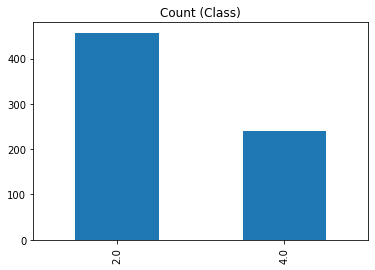

In [9]:
target_count = breast_cancer_data.Class.value_counts()
print('Benign :', target_count.values[0])
print('Malignant:', target_count.values[1])
print('Proportion:', round(target_count.values[1] / target_count.values[0], 2), ': 1')

target_count.plot(kind='bar', title='Count (Class)');

## 2.5/- Data integration 

There are three main steps in this process: 

- **Data integration:**

In our case we have only one source which is the breast-cancer-wisconsin.data file. we have realized this step in section 2.1

- **Entity identification problem:** 

For this we will study the corellation between the data to be able to detect the data that are strongly correlated with each other and that are weakly correlated with the class attribute. Generally we delete the data that are weakly correlated with the class, since they won't give us so much information about our class. Also we leave only one attribute among those that are strongly correlated, since it's unitile to repeat almost the same information in two columns. Generally we delete the attribute that weakly correlate with the class. this is the purpose of sections 2.5.1 and 2.5.2

- **Detecting and resolving data value conflicts:**

Contrast measures using various units. Variables assessed at various scales do not contribute evenly to the analysis and may result in a bais. to avoid this problem we normalize our data (see section 2.6) 


### 2.5.1/- Correlation of data

We notice in the graph below that the variables are not strongly correlated except some (Uniformity of Cell Size and Uniformity of Cell Shape 90%). Because of the low number of variables and the fact that the clustering algo are not very affected by the collinearity / correlations so we are not going to delete any variable in this step.

<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Matrice de correlation')

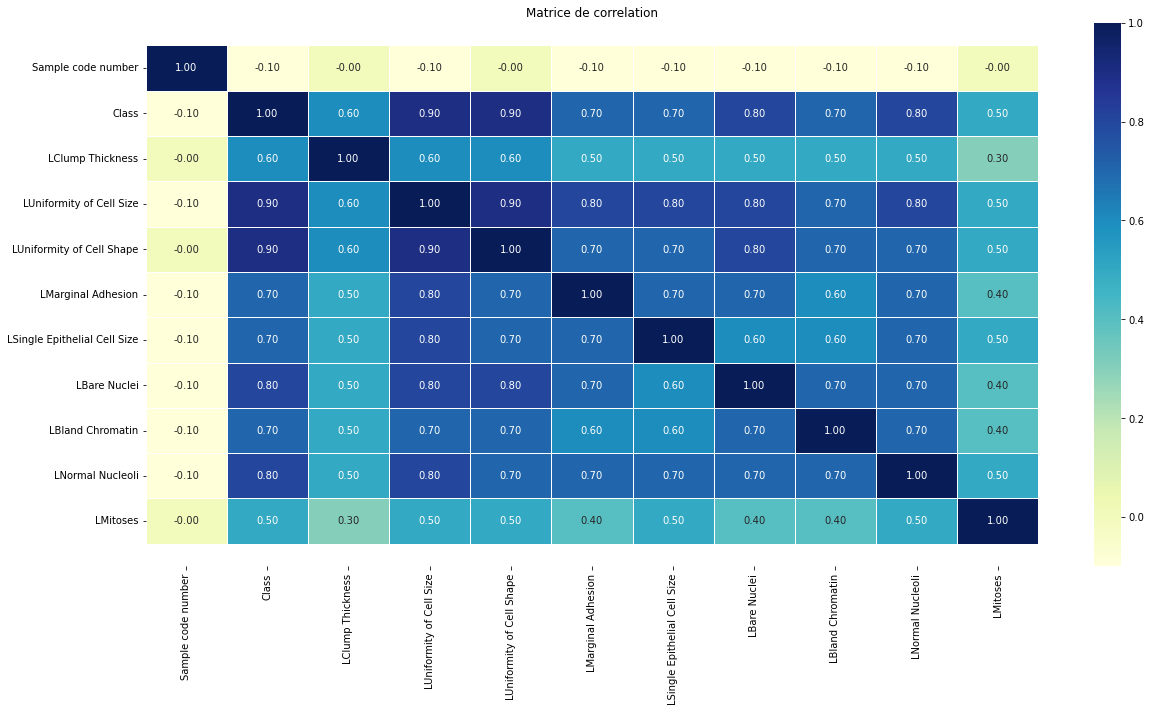

In [10]:
import seaborn as sns

matrice_corr = breast_cancer_data.corr().round(1)
print(type(matrice_corr))
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(matrice_corr,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu", );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
ax.set_title("Matrice de correlation")

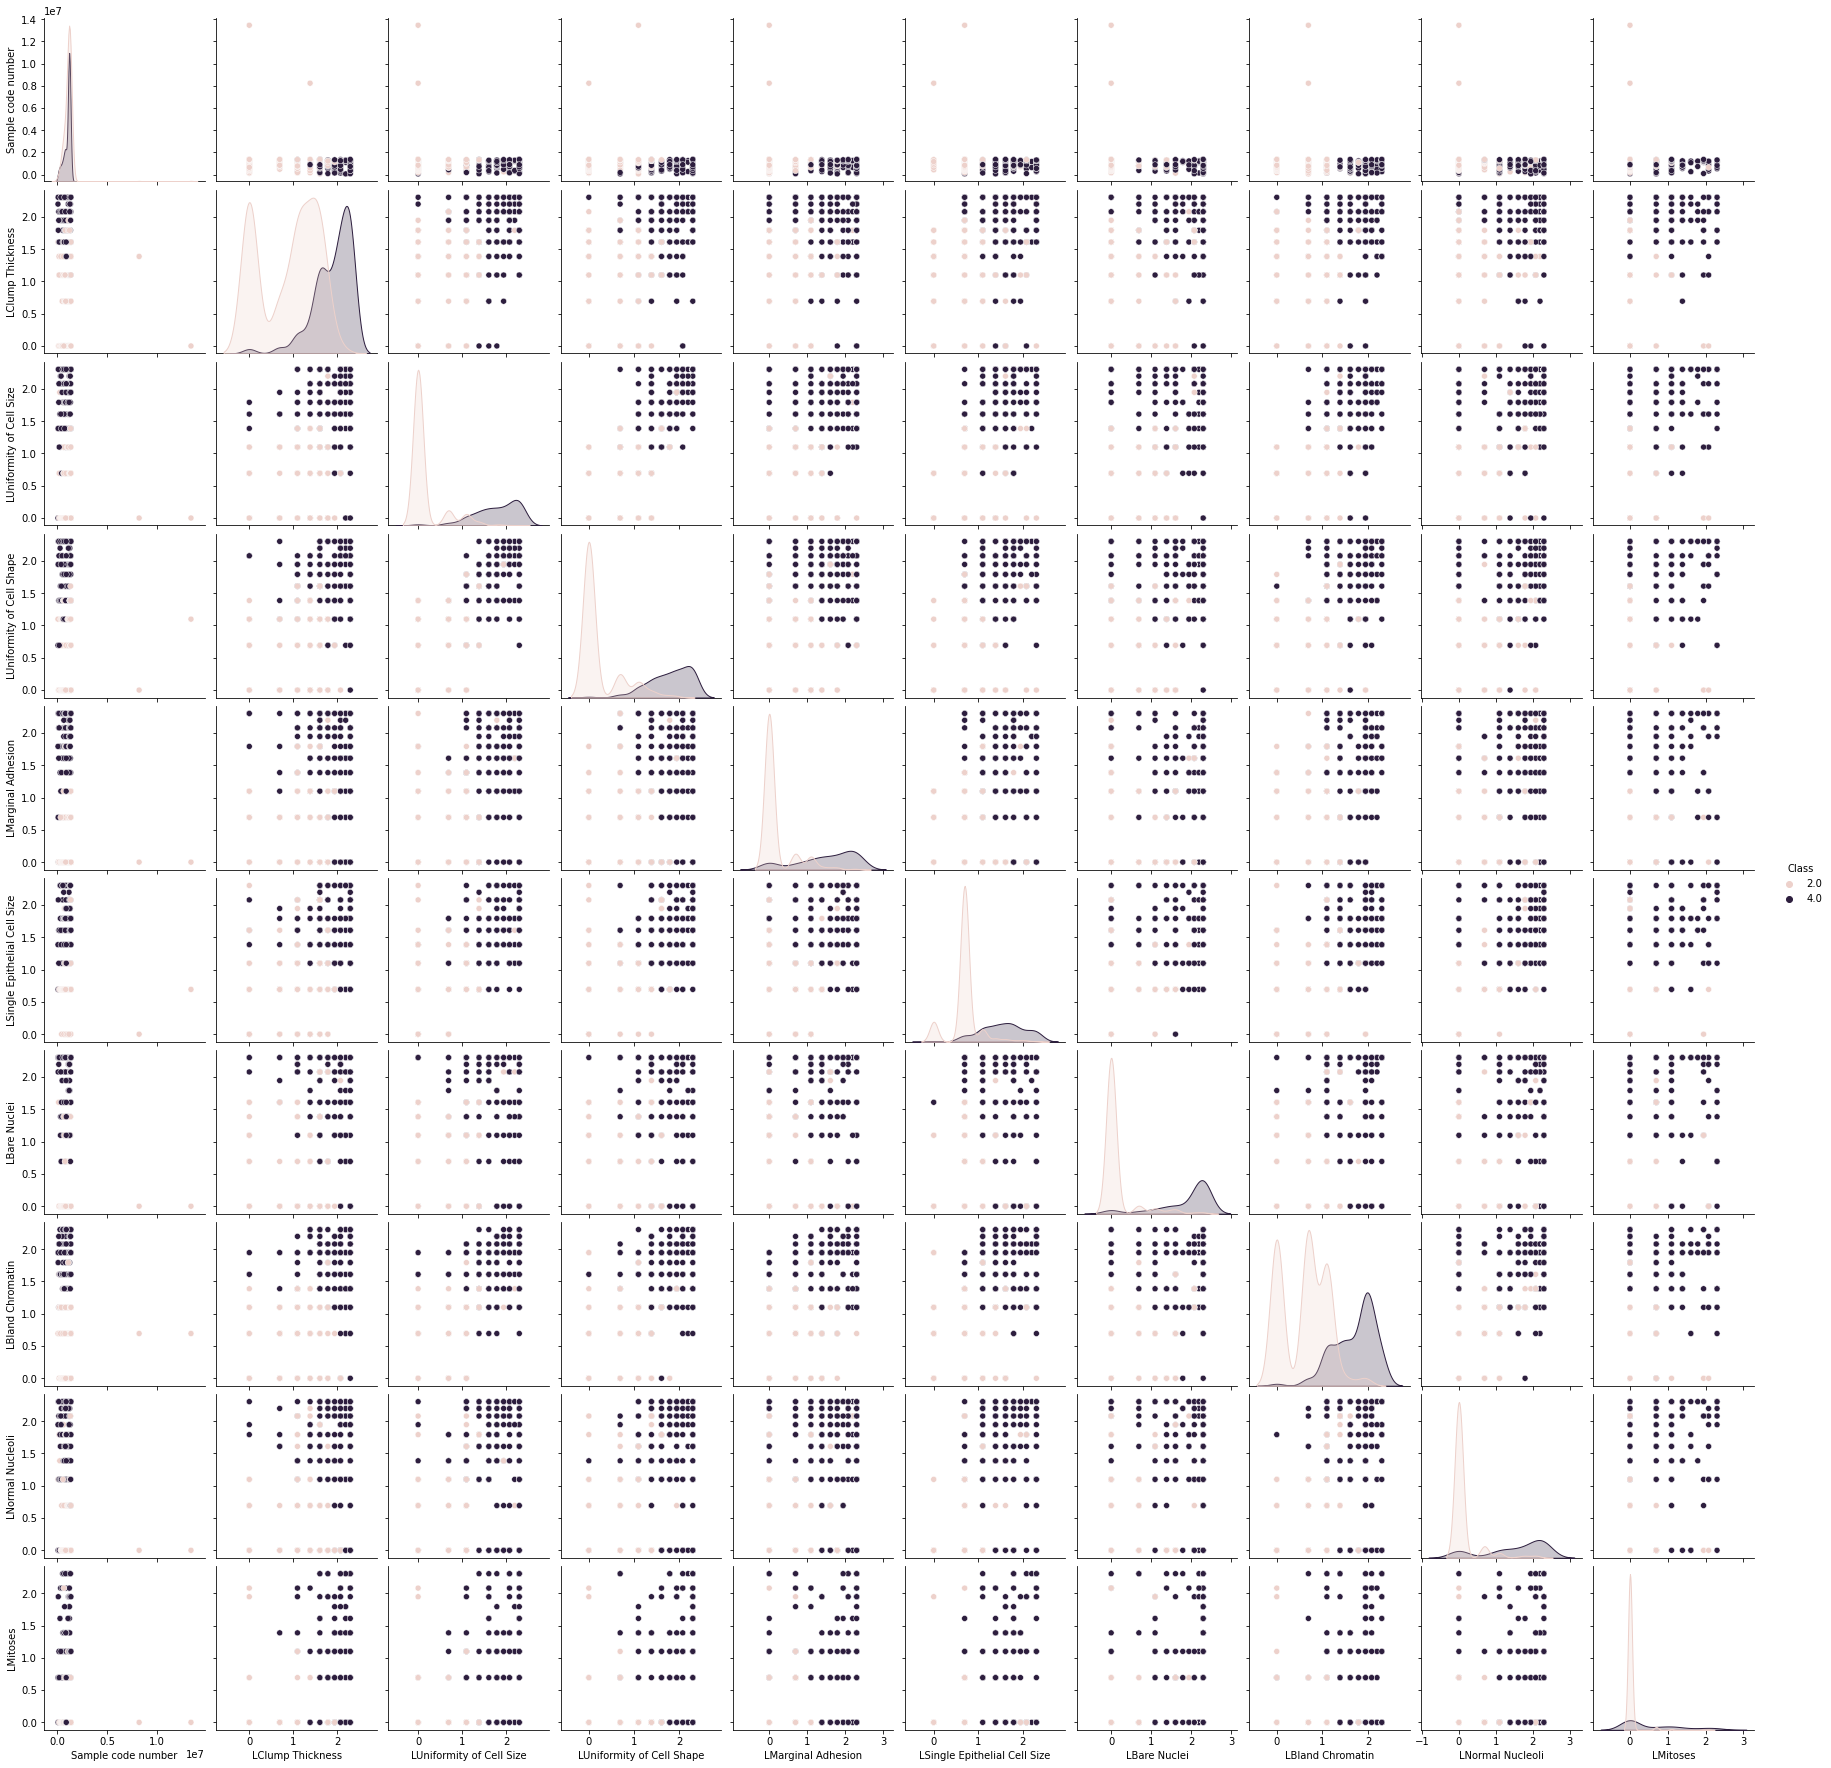

In [11]:
import seaborn as sns
df = breast_cancer_data
df = df[~df.index.duplicated()]
sns.pairplot(df, hue="Class")


### 2.5.2/- Correlation of data with class 

in the graph below we notice that the variable Sample code number is very weakly correlated with the class on the contrary of the other variables what allowed us to remove it .


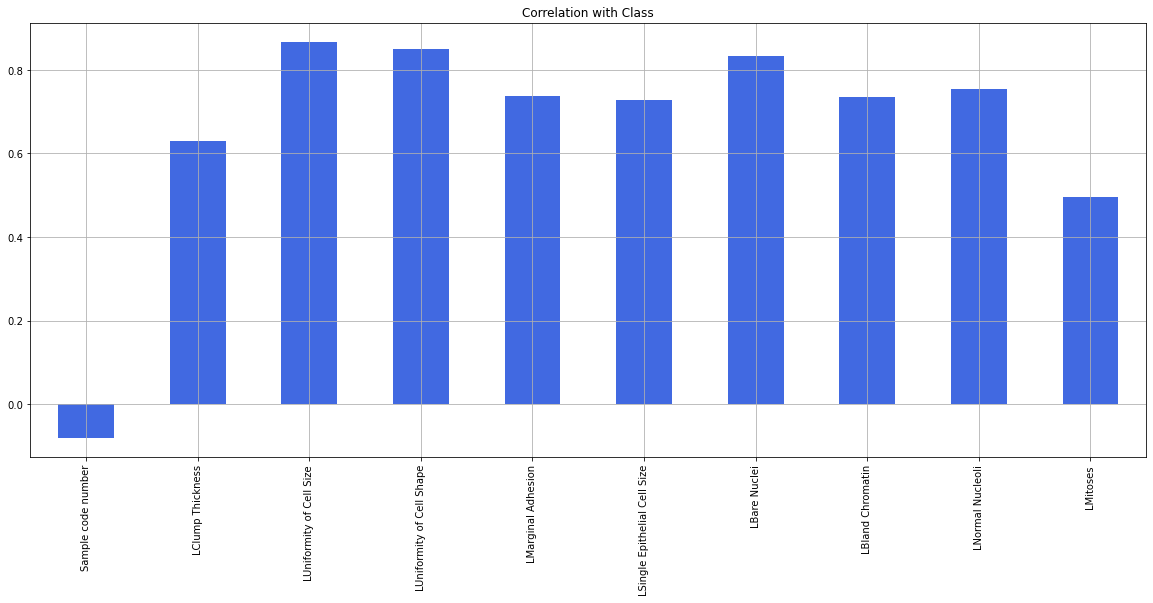

In [12]:
breast_cancer_data.drop('Class', axis=1).corrwith(breast_cancer_data.Class).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Class",color="royalblue");


In [13]:
#remove Sample code number attribute
del breast_cancer_data['Sample code number']

# 2.6/- Data tranformation (Normalization)

we have several types of data normalization such as : 

- **Z Normalization(Standardization):**

The mean of the data is set to 0 and the standard deviation is set to 1. In most circumstances, standardization is employed on a feature-by-feature basis.

$ \large Z = \frac{x - \mu }{\sigma}$

where:

μ is the mean of the population,

σ is the standard deviation of the population.

- **Min-Max Normalization:**

This technique rescales the data range to [0,1]. In most situations, standardization is also employed in terms of features.

$ \large Z = {\frac  {x-{\text{min}}(x)}{{\text{max}}(x)-{\text{min}}(x)}}$


- **Unit Vector Normalization:** 

A vector (a row of data may be considered as a D-dimensional vector) is shrunk/stretched to a unit sphere when scaled to unit length. When applied to the full dataset, the modified data may be seen as a slew of vectors pointing in various directions on the D-dimensional unit sphere.

$\large  \hat{u} ={\frac {{u} }{| {u} |}}$

where |u| is the norm (or length) of u.


In our cas we use **Z Normalization(Standardization)**.

In [14]:
from sklearn import preprocessing
# separet class attribute 
Y = breast_cancer_data["Class"].values
X = breast_cancer_data.drop(columns=['Class']).values

# normalization
X_norm = preprocessing.StandardScaler().fit_transform(X)


# 3/- Clustering methods

Clustering is essentially an unsupervised learning approach. An unsupervised learning strategy is one in which we draw references from datasets that only contain input data and no labeled replies. It is commonly used as a procedure to discover significant structure, explanatory underlying processes, generative qualities, and groups inherent in a set of instances. 

Is the process of separating a population or set of data points into several groups such that data points in the same group are more similar to one another and different to data points in other groups. It is essentially a collection of items based on their similarity and dissimilarity.

There are several apps for clustering which are : 
- Partitioning clustering approaches

- Hierarchical clustering approaches

- Density-based clustering approaches

- Grid-based clustering approaches ...


In our project we have to choose two algorithms and compare them among those already implemented in the scikit-learn lib.


**Evaluation metrics :**

In our case we, have the annotated dataset and we can clearly see that we have two clusters. Wich allows us to calculate the different measures of the confusion matrix (accuracy, precesion, recall, F1 score ...) .

We can also calculate as a measure Sum of Squared Error (SSE).This methode allows to evaluate the goodness of a clustering by considering how well the clusters are separated, and how compact the clusters are; without reference to external information and by using certain clustering quality measures


## 3.1/- K-means

The KMeans method clusters data by attempting to split samples into n groups of similar variance while reducing the inertia or within-cluster sum-of-squares criteria . The number of clusters must be given for this algorithm. It scales effectively to large numbers of samples and has been utilized in a wide variety of application areas in a variety of fields.

The k-means technique separates a collection of data into disjoint clusters, each of which is described by the mean of the samples in the cluster. The means are frequently referred to as the cluster's centroids keep in mind that they are not, in general, points from, although being in the same area.

To find the number of k needed we use the elbow method . 

In the Elbow method, we change the amount of clusters (K) from 1 to 10. We are computing SSE for each value of K.  SSE WCSSsse is the sum of the squared distances between each point in a cluster and its centroid. When we plot the SSE with the K value, we get an Elbow. The SSE value decreases as the number of clusters grows. When K = 1, the SSE value is the highest. When we examine the graph , we can observe that it rapidly changes at a spot, resulting in an elbow form. The graph begins to travel practically parallel to the X-axis at this point. This point's K value corresponds to the ideal K value or the optimal number of clusters. 

In our graph below, we can see clairly that K = 2. 

### 3.1.1/- Implimentation

C:\Users\TRETEC\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1040: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


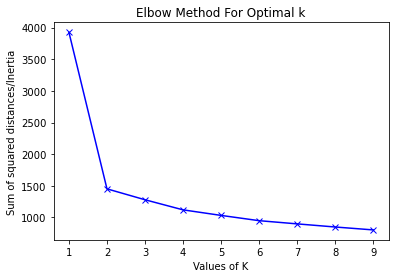

In [15]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score,  recall_score, precision_score
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

y_pred = kmeans.labels_
print(len(y_pred[y_pred == 1]))
print(len(y_pred[y_pred == 0]))


446
252


After the application of Kmeans we have two clusters 1 and 0. By counting the number of each we can deduce that the 0 = Malignant and 1 = Benign   

### 3.1.2/- Evaluation

In [17]:
y_pred[y_pred == 1] = 4
y_pred[y_pred == 0] = 2
print("accuracy = ", accuracy_score(Y, y_pred))
print("recall  = ", recall_score(Y, y_pred, pos_label = 2.0))
print("precision  = ", precision_score(Y, y_pred, pos_label = 2.0))
print("SSE = ",kmeans.inertia_ )


accuracy =  0.03008595988538682
recall  =  0.0350109409190372
precision  =  0.06349206349206349
SSE =  1451.8931246426348


## 3.2/- Mean shift

The goal of MeanShift clustering is to find blobs in a smooth density of data. It is a centroid-based technique that operates by updating candidates for centroids to be the mean of the points inside a specific area. These candidates are subsequently filtered in a post-processing stage to remove near-duplicates, resulting in the final collection of centroids.

When a candidate centroid is given for iteration, the candidate is updated using the following equation:

$ \large x_{i}^{t+1} = m(x_{i}^{t}) $

Where : 

$\large m(x) = \frac{ \sum_{x_i \in N(x)} K(x_i - x) x_i } {\sum_{x_i \in N(x)} K(x_i - x)} $

and $ N(x_i)$ is the neighborhood of samples within a given distance around  $x_i$ and $m$ is the mean shift vector that is computed for each centroid that points towards a region of the maximum increase in the density of points.

Instead of depending on a parameter bandwidth, which governs the size of the zone to search across, the algorithm automatically determines the number of clusters. This parameter can be manually specified, but it can also be approximated using the estimate bandwidth function, which is invoked if the bandwidth is not set.

The numbre of cluster is perfectly estimated k = 2 .

### 3.2.1/- Implimentation

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

# estimate bandwidth
bandwidth = estimate_bandwidth(X)

# mean shift
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)
y_pred_meanshift = meanshift.labels_

# calculat numbre of 1 and 0 to match the real class
print(len(y_pred_meanshift[y_pred_meanshift == 1]))
print(len(y_pred_meanshift[y_pred_meanshift == 0]))



243
450


### 3.2.2/- Evaluation

In [113]:
y_pred_meanshift[y_pred_meanshift == 1] = 4
y_pred_meanshift[y_pred_meanshift == 0] = 2
print("accuracy = ", accuracy_score(Y, y_pred_meanshift))
print("recall  = ", recall_score(Y, y_pred_meanshift, pos_label = 2.0))
print("precision  = ", precision_score(Y, y_pred_meanshift, pos_label = 2.0))


accuracy =  0.9598853868194842
recall  =  0.9671772428884027
precision  =  0.9714285714285714


## 3.3/- Comparaision


K-means and mainshift are two clustering algorithms implemented in the scikit-learn lib. Each of these two algo has its weak and strong points which is summarized in the table below .




|    Methods    |       Parameters       |     method to  set parms    |          Metric         |          scalability         | advantages                                                                                                                                                                                   | inconvenients                                                                                                                                                                                             |
|:-------------:|:----------------------:|:---------------------------:|:-----------------------:|:----------------------------:|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|   **Kmeans**  | K : numbre of  cluster |            Elbow, Silhouette            | Distance between points | Yes;  large simple; medium k | <ul style ="text-align: left"> <li>Scale with n_sample</li> <li>Sample to implement</li> <li>Generalize to cluster with different shape and size</li> </ul>                                 | <ul style = "text-align: left"> <li>need to specify K</li> <li>sensitive to noisy data</li> <li>Non convex shapes</li> <li> initial centroid are often chosen randomly </li> </ul>                       |
| **Meanshift** |        bandwidth       | esitmate  bandwidth sklearn | Distance between points |              No              | <ul style= "text-align: left"> <li>Model-free does not assume any priory shape</li> <li>Signle param bandwidth (physical mining unlike k in k-means)</li> <li>Robust to outliers </ul>  | <ul style = "text-align: left"> <li>Outputs depends on bandwidth</li> <li>Bandwidth selection is not trivial</li> <li>relatively expensive</li> <li> Do not scale with dimension of features </li> </ul> |
    
To compare the performance of the two methods and with the presence of the class variable, we used the following three measures:

**Accuracy** : is the fraction of the correctly classified instances  among all instances

$\large accuracy = \frac  {correctly classified instances}{All instances} $


**Recall** : is the fraction of relevant instances that were retrieved.

$\large { {\text{recall}}={\frac {|\{{\text{relevant documents}}\}\cap \{{\text{retrieved documents}}\}|}{|\{{\text{relevant documents}}\}|}}}$


**Precision** : is the fraction of relevant instances among the retrieved instances

$ \large { {\text{precision}}={\frac {|\{{\text{relevant documents}}\}\cap \{{\text{retrieved documents}}\}|}{|\{{\text{retrieved documents}}\}|}}}$

> credit defintion to wikipedia


After running the two methods on our dataset we got the results in the table below: 

|    Methods    | auto determination  of k | Accuracy | Recall | Precision |
|:-------------:|--------------------------|----------|--------|-----------|
|   **Kmeans**  |  k = 2 , yes             | 0.97     | 0.96   | 0.98      |
| **Meanshift** |  k = 2 , yes             | 0.96     | 0.97   | 0.97      |


# Conclusion

We notice that we have results close to both algo's which makes our choice difficult. We notice that we have results close to both algo's which makes our choice difficult. Here k mean is better in accuracy and precision and mean shift is better in recall. 

On the other hand, in such a medical problem it is better to predict the absence of cancer when in reality this cancer occurs, than to predict the presence of cancer, when in reality this cancer does not occur. when in reality this one does not take place. n order to do this we favor the precision . So the best model here is the **K-means with K = 2** . 

At the end, we will say that there are several other clustering models implemented on python or other languages and other evaluation measures. On the scikit-learn library you can find several ([check here](https://scikit-learn.org/stable/modules/clustering.html)) .  

# Refernces 

> Course Fouille de données paris saclay Z. CHELLY DAGDIA & K. ZEITOUNI

> scikit-learn library https://scikit-learn.org/stable/modules/clustering.html

> wikipidia https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers

> Deepanshi analytics vidhya https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/

> Dr. William H. Wolberg and the University of Wisconsin Hospitals for Dataset

> iris dataset https://archive.ics.uci.edu/ml/datasets/iris

> weka tool https://www.weka.fr/